In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [2]:
df = pd.read_csv("MasterDataframe.csv")
df.head(50)

,Game ID,Week,Date,Time (EST),Location,Home Team,Away Team,Home Score,Away Score,Total Points,...,Precip Type,Temp,Apparent Temp,Humidity,Wind Speed,Wind Gust,Cloud Cover,UV Index,Visibility,Indoor
0,45944,1,2018-09-06,8:20PM,Lincoln Financial Field,PHI,ATL,18,12,30,...,rain,81.35,85.2,0.7,2.92,4.52,0.56,0,10,False
1,45945,1,2018-09-09,1:00PM,M&T Bank Stadium,BAL,BUF,47,3,50,...,rain,62.57,62.66,0.88,11.98,20.49,1,4,4.83,False
2,45946,1,2018-09-09,1:00PM,Lucas Oil Stadium,IND,CIN,23,34,57,...,rain,59.17,59.2,0.94,9.64,10.26,1,4,3.26,True
3,45947,1,2018-09-09,1:00PM,Gillette Stadium,NE,HOU,27,20,47,...,No Data,62.22,62.22,0.61,6.7,8.48,0.78,5,10,False
4,45948,1,2018-09-09,1:00PM,MetLife Stadium,NYG,JAX,15,20,35,...,rain,58.85,58.85,0.86,4.75,5.52,1,4,8.95,False
5,45949,1,2018-09-09,1:00PM,FirstEnergy Stadium,CLE,PIT,21,21,42,...,rain,59.36,59.36,0.92,4.75,8.27,1,4,2.3,False
6,45950,1,2018-09-09,1:00PM,US Bank Stadium,MIN,SF,24,16,40,...,No Data,68.37,68.37,0.59,9.28,11.52,0.16,5,10,True
7,45951,1,2018-09-09,1:00PM,Mercedes-Benz Superdome,NO,TB,40,48,88,...,No Data,88.27,97.12,0.63,1.49,2.73,0.62,6,10,True
8,45952,1,2018-09-09,1:00PM,Hard Rock Stadium,MIA,TEN,27,20,47,...,No Data,88.66,97.33,0.61,4.16,6.23,0.75,6,10,False
9,45953,1,2018-09-09,4:05PM,Dignity Health Sports Park,LAC,KC,28,38,66,...,No Data,85.35,85.35,0.43,5.19,7.95,0.01,9,8.13,False


In [3]:
outdoor_df = df.loc[df["Indoor"] == False, :]
outdoor_df.head()

,Game ID,Week,Date,Time (EST),Location,Home Team,Away Team,Home Score,Away Score,Total Points,...,Precip Type,Temp,Apparent Temp,Humidity,Wind Speed,Wind Gust,Cloud Cover,UV Index,Visibility,Indoor
0,45944,1,2018-09-06,8:20PM,Lincoln Financial Field,PHI,ATL,18,12,30,...,rain,81.35,85.2,0.7,2.92,4.52,0.56,0,10,False
1,45945,1,2018-09-09,1:00PM,M&T Bank Stadium,BAL,BUF,47,3,50,...,rain,62.57,62.66,0.88,11.98,20.49,1,4,4.83,False
3,45947,1,2018-09-09,1:00PM,Gillette Stadium,NE,HOU,27,20,47,...,No Data,62.22,62.22,0.61,6.7,8.48,0.78,5,10,False
4,45948,1,2018-09-09,1:00PM,MetLife Stadium,NYG,JAX,15,20,35,...,rain,58.85,58.85,0.86,4.75,5.52,1,4,8.95,False
5,45949,1,2018-09-09,1:00PM,FirstEnergy Stadium,CLE,PIT,21,21,42,...,rain,59.36,59.36,0.92,4.75,8.27,1,4,2.3,False


In [4]:
indoor_df = df.loc[df["Indoor"] == True, :]
indoor_df.head(50)

,Game ID,Week,Date,Time (EST),Location,Home Team,Away Team,Home Score,Away Score,Total Points,...,Precip Type,Temp,Apparent Temp,Humidity,Wind Speed,Wind Gust,Cloud Cover,UV Index,Visibility,Indoor
2,45946,1,2018-09-09,1:00PM,Lucas Oil Stadium,IND,CIN,23,34,57,...,rain,59.17,59.2,0.94,9.64,10.26,1,4,3.26,True
6,45950,1,2018-09-09,1:00PM,US Bank Stadium,MIN,SF,24,16,40,...,No Data,68.37,68.37,0.59,9.28,11.52,0.16,5,10,True
7,45951,1,2018-09-09,1:00PM,Mercedes-Benz Superdome,NO,TB,40,48,88,...,No Data,88.27,97.12,0.63,1.49,2.73,0.62,6,10,True
12,45956,1,2018-09-09,4:25PM,State Farm Stadium,ARI,WAS,6,24,30,...,No Data,100.84,100.84,0.23,3.09,8.34,0.12,8,10,True
14,45958,1,2018-09-10,7:10PM,Ford Field,DET,NYJ,17,48,65,...,No Data,63.56,63.56,0.81,7.94,8.28,1,0,10,True
17,45961,2,2018-09-16,1:00PM,Mercedes-Benz Stadium,ATL,CAR,31,24,55,...,rain,79.2,81.88,0.72,5.91,10.48,No Data,No Data,3.04,True
18,45962,2,2018-09-16,1:00PM,Mercedes-Benz Superdome,NO,CLE,21,18,39,...,rain,91.06,103.1,0.61,1.78,2.77,No Data,No Data,10,True
30,45974,2,2018-09-16,8:20PM,AT&T Stadium,DAL,NYG,20,13,33,...,No Data,87.31,93.05,0.58,2.47,3.04,0.29,0,10,True
33,45977,3,2018-09-23,1:00PM,US Bank Stadium,MIN,BUF,6,27,33,...,No Data,69.02,69.02,0.56,6.2,6.54,0.04,5,10,True
38,45982,3,2018-09-23,1:00PM,Mercedes-Benz Stadium,ATL,NO,37,43,80,...,No Data,85.07,86.82,0.51,3.32,7.8,0.47,6,3.94,True


In [7]:
# Generate some fake data to test with
def gendata(loc1=0, loc2=0):
    population1 = indoor_df["Total Yards"]
    population2 = outdoor_df["Total Yards"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="Indoor")
    plt.scatter(range(len(population2)), population2, label="Outdoor")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="Indoor")
    plt.hist(population2, 10, density=True, alpha=0.7, label="Outdoor")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

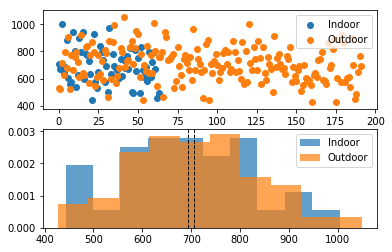

In [8]:
population1, population2 = gendata()

In [9]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=-0.7220619396085387, pvalue=0.47186537793742944)

In [10]:
rain_df = df.loc[df["Precip Type"] == "rain"]
rain_df = rain_df.loc[rain_df["Indoor"] == False, :]
rain_df.head(50)

,Game ID,Week,Date,Time (EST),Location,Home Team,Away Team,Home Score,Away Score,Total Points,...,Precip Type,Temp,Apparent Temp,Humidity,Wind Speed,Wind Gust,Cloud Cover,UV Index,Visibility,Indoor
0,45944,1,2018-09-06,8:20PM,Lincoln Financial Field,PHI,ATL,18,12,30,...,rain,81.35,85.2,0.7,2.92,4.52,0.56,0,10,False
1,45945,1,2018-09-09,1:00PM,M&T Bank Stadium,BAL,BUF,47,3,50,...,rain,62.57,62.66,0.88,11.98,20.49,1,4,4.83,False
4,45948,1,2018-09-09,1:00PM,MetLife Stadium,NYG,JAX,15,20,35,...,rain,58.85,58.85,0.86,4.75,5.52,1,4,8.95,False
5,45949,1,2018-09-09,1:00PM,FirstEnergy Stadium,CLE,PIT,21,21,42,...,rain,59.36,59.36,0.92,4.75,8.27,1,4,2.3,False
19,45963,2,2018-09-16,1:00PM,Nissan Stadium,TEN,HOU,20,17,37,...,rain,81.59,84.75,0.65,7.42,7.42,No Data,No Data,10,False
20,45964,2,2018-09-16,1:00PM,FedEx Field,WAS,IND,9,21,30,...,rain,73.86,74.77,0.81,5.59,8.3,No Data,No Data,7.72,False
21,45965,2,2018-09-16,1:00PM,Heinz Field,PIT,KC,37,42,79,...,rain,79.61,81.7,0.64,7.35,7.91,No Data,No Data,10,False
22,45966,2,2018-09-16,1:00PM,New Era Field,BUF,LAC,20,31,51,...,rain,79.92,82.73,0.69,2.42,5.64,No Data,No Data,10,False
23,45967,2,2018-09-16,1:00PM,MetLife Stadium,NYJ,MIA,12,20,32,...,rain,82.87,85.17,0.57,3.56,4.82,No Data,No Data,10,False
24,45968,2,2018-09-16,1:00PM,Lambeau Field,GB,MIN,29,29,58,...,rain,78.16,79.01,0.71,5.24,5.43,No Data,No Data,10,False


In [12]:
rain_df["Total Fumbles"] = rain_df["Home Fumbles"] + rain_df["Away Fumbles"]
rain_df.head(10)

,Game ID,Week,Date,Time (EST),Location,Home Team,Away Team,Home Score,Away Score,Total Points,...,Temp,Apparent Temp,Humidity,Wind Speed,Wind Gust,Cloud Cover,UV Index,Visibility,Indoor,Total Fumbles
0,45944,1,2018-09-06,8:20PM,Lincoln Financial Field,PHI,ATL,18,12,30,...,81.35,85.2,0.7,2.92,4.52,0.56,0,10,False,3
1,45945,1,2018-09-09,1:00PM,M&T Bank Stadium,BAL,BUF,47,3,50,...,62.57,62.66,0.88,11.98,20.49,1,4,4.83,False,5
4,45948,1,2018-09-09,1:00PM,MetLife Stadium,NYG,JAX,15,20,35,...,58.85,58.85,0.86,4.75,5.52,1,4,8.95,False,1
5,45949,1,2018-09-09,1:00PM,FirstEnergy Stadium,CLE,PIT,21,21,42,...,59.36,59.36,0.92,4.75,8.27,1,4,2.3,False,4
19,45963,2,2018-09-16,1:00PM,Nissan Stadium,TEN,HOU,20,17,37,...,81.59,84.75,0.65,7.42,7.42,No Data,No Data,10,False,3
20,45964,2,2018-09-16,1:00PM,FedEx Field,WAS,IND,9,21,30,...,73.86,74.77,0.81,5.59,8.3,No Data,No Data,7.72,False,3
21,45965,2,2018-09-16,1:00PM,Heinz Field,PIT,KC,37,42,79,...,79.61,81.7,0.64,7.35,7.91,No Data,No Data,10,False,6
22,45966,2,2018-09-16,1:00PM,New Era Field,BUF,LAC,20,31,51,...,79.92,82.73,0.69,2.42,5.64,No Data,No Data,10,False,4
23,45967,2,2018-09-16,1:00PM,MetLife Stadium,NYJ,MIA,12,20,32,...,82.87,85.17,0.57,3.56,4.82,No Data,No Data,10,False,7
24,45968,2,2018-09-16,1:00PM,Lambeau Field,GB,MIN,29,29,58,...,78.16,79.01,0.71,5.24,5.43,No Data,No Data,10,False,1


In [45]:
rain_df["Total Fumbles"].mean()

2.717948717948718

In [16]:
non_rain_df = df.loc[df["Precip Type"] != "rain"]
non_rain_df = non_rain_df.loc[non_rain_df["Precip Type"] != "snow"]
non_rain_df["Total Fumbles"] = non_rain_df["Home Fumbles"] + non_rain_df["Away Fumbles"]
non_rain_df.head(150)

,Game ID,Week,Date,Time (EST),Location,Home Team,Away Team,Home Score,Away Score,Total Points,...,Temp,Apparent Temp,Humidity,Wind Speed,Wind Gust,Cloud Cover,UV Index,Visibility,Indoor,Total Fumbles
3,45947,1,2018-09-09,1:00PM,Gillette Stadium,NE,HOU,27,20,47,...,62.22,62.22,0.61,6.7,8.48,0.78,5,10,False,4
6,45950,1,2018-09-09,1:00PM,US Bank Stadium,MIN,SF,24,16,40,...,68.37,68.37,0.59,9.28,11.52,0.16,5,10,True,4
7,45951,1,2018-09-09,1:00PM,Mercedes-Benz Superdome,NO,TB,40,48,88,...,88.27,97.12,0.63,1.49,2.73,0.62,6,10,True,3
8,45952,1,2018-09-09,1:00PM,Hard Rock Stadium,MIA,TEN,27,20,47,...,88.66,97.33,0.61,4.16,6.23,0.75,6,10,False,0
9,45953,1,2018-09-09,4:05PM,Dignity Health Sports Park,LAC,KC,28,38,66,...,85.35,85.35,0.43,5.19,7.95,0.01,9,8.13,False,2
10,45954,1,2018-09-09,4:25PM,Bank of America Stadium,CAR,DAL,16,8,24,...,83.77,88.82,0.66,6.47,6.93,0.66,3,10,False,3
11,45955,1,2018-09-09,4:25PM,Broncos Stadium at Mile High,DEN,SEA,27,24,51,...,85.18,85.18,0.15,3.7,11.93,0.16,6,3.91,False,3
12,45956,1,2018-09-09,4:25PM,State Farm Stadium,ARI,WAS,6,24,30,...,100.84,100.84,0.23,3.09,8.34,0.12,8,10,True,4
13,45957,1,2018-09-09,8:20PM,Lambeau Field,GB,CHI,24,23,47,...,60.07,60.07,0.65,4.81,5.92,0,0,10,False,4
14,45958,1,2018-09-10,7:10PM,Ford Field,DET,NYJ,17,48,65,...,63.56,63.56,0.81,7.94,8.28,1,0,10,True,1


In [46]:
non_rain_df["Total Fumbles"].mean()

2.4158415841584158

In [17]:
# Generate some fake data to test with
def gendata(loc1=0, loc2=0):
    population1 = rain_df["Total Fumbles"]
    population2 = non_rain_df["Total Fumbles"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="Rainy Games")
    plt.scatter(range(len(population2)), population2, label="Non Rainy Games")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="Rainy Games")
    plt.hist(population2, 10, density=True, alpha=0.7, label="Non Rainy Games")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

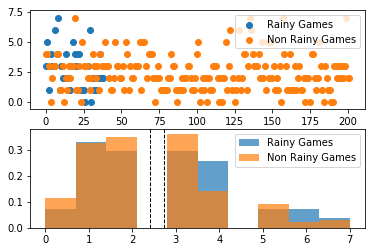

In [18]:
population1, population2 = gendata()

In [19]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=1.039850004894451, pvalue=0.30333049744467205)

In [20]:
wind_df = df.loc[df["Wind Speed"] != "No Data",:]
wind_df["Wind Speed"] = wind_df["Wind Speed"].astype(float)
wind_df = wind_df.loc[wind_df["Indoor"] == False, :]
wind_df = wind_df.loc[wind_df["Wind Speed"] >= 10, :]
wind_df.head(22)

,Game ID,Week,Date,Time (EST),Location,Home Team,Away Team,Home Score,Away Score,Total Points,...,Precip Type,Temp,Apparent Temp,Humidity,Wind Speed,Wind Gust,Cloud Cover,UV Index,Visibility,Indoor
1,45945,1,2018-09-09,1:00PM,M&T Bank Stadium,BAL,BUF,47,3,50,...,rain,62.57,62.66,0.88,11.98,20.49,1,4,4.83,False
54,45998,4,2018-09-30,1:00PM,TIAA Bank Field,JAX,NYJ,31,12,43,...,No Data,86.88,95.65,0.67,10.09,10.3,0.74,5,9.65,False
99,46044,7,2018-10-21,1:00PM,TIAA Bank Field,JAX,HOU,7,20,27,...,No Data,70.77,70.77,0.52,13.02,15.12,0.32,5,9.8,False
100,46045,7,2018-10-21,1:00PM,MetLife Stadium,NYJ,MIN,17,37,54,...,No Data,46.35,40.89,0.49,11.83,18.07,0.95,3,10,False
102,46047,7,2018-10-21,4:05PM,M&T Bank Stadium,BAL,NO,23,24,47,...,No Data,52.46,52.46,0.41,12.15,21.9,0.4,1,10,False
103,46048,7,2018-10-21,4:25PM,FedEx Field,WAS,DAL,20,17,37,...,No Data,51.82,51.82,0.43,11.17,18.4,0.49,1,8.52,False
108,46052,8,2018-10-28,9:30AM,Wembley Stadium,JAX,PHI,18,24,42,...,rain,48.91,43.73,0.63,13.13,24.17,0.52,1,6.22,False
112,46056,8,2018-10-28,1:00PM,Soldier Field,CHI,NYJ,24,10,34,...,No Data,48.07,43.27,0.78,11.12,19.53,1,2,10,False
126,46070,9,2018-11-04,1:00PM,FirstEnergy Stadium,CLE,KC,21,37,58,...,No Data,54.93,54.93,0.46,11.66,11.66,0.14,3,10,False
127,46071,9,2018-11-04,1:00PM,Hard Rock Stadium,MIA,NYJ,13,6,19,...,No Data,86,93.02,0.65,14.33,14.71,0.53,5,10,False


In [21]:
wind_df["Total Interceptions"] = wind_df["Home Interceptions"] + wind_df["Away Interceptions"]
wind_df.head(20)

,Game ID,Week,Date,Time (EST),Location,Home Team,Away Team,Home Score,Away Score,Total Points,...,Temp,Apparent Temp,Humidity,Wind Speed,Wind Gust,Cloud Cover,UV Index,Visibility,Indoor,Total Interceptions
1,45945,1,2018-09-09,1:00PM,M&T Bank Stadium,BAL,BUF,47,3,50,...,62.57,62.66,0.88,11.98,20.49,1,4,4.83,False,2
54,45998,4,2018-09-30,1:00PM,TIAA Bank Field,JAX,NYJ,31,12,43,...,86.88,95.65,0.67,10.09,10.3,0.74,5,9.65,False,1
99,46044,7,2018-10-21,1:00PM,TIAA Bank Field,JAX,HOU,7,20,27,...,70.77,70.77,0.52,13.02,15.12,0.32,5,9.8,False,1
100,46045,7,2018-10-21,1:00PM,MetLife Stadium,NYJ,MIN,17,37,54,...,46.35,40.89,0.49,11.83,18.07,0.95,3,10,False,3
102,46047,7,2018-10-21,4:05PM,M&T Bank Stadium,BAL,NO,23,24,47,...,52.46,52.46,0.41,12.15,21.9,0.4,1,10,False,0
103,46048,7,2018-10-21,4:25PM,FedEx Field,WAS,DAL,20,17,37,...,51.82,51.82,0.43,11.17,18.4,0.49,1,8.52,False,0
108,46052,8,2018-10-28,9:30AM,Wembley Stadium,JAX,PHI,18,24,42,...,48.91,43.73,0.63,13.13,24.17,0.52,1,6.22,False,1
112,46056,8,2018-10-28,1:00PM,Soldier Field,CHI,NYJ,24,10,34,...,48.07,43.27,0.78,11.12,19.53,1,2,10,False,0
126,46070,9,2018-11-04,1:00PM,FirstEnergy Stadium,CLE,KC,21,37,58,...,54.93,54.93,0.46,11.66,11.66,0.14,3,10,False,2
127,46071,9,2018-11-04,1:00PM,Hard Rock Stadium,MIA,NYJ,13,6,19,...,86,93.02,0.65,14.33,14.71,0.53,5,10,False,4


In [23]:
non_wind_df = df.loc[df["Wind Speed"] != "No Data",:]
non_wind_df["Wind Speed"] = non_wind_df["Wind Speed"].astype(float)
non_wind_df = non_wind_df.loc[non_wind_df["Indoor"] == False, :]
non_wind_df = non_wind_df.loc[non_wind_df["Wind Speed"] < 10, :]
non_wind_df["Total Interceptions"] = non_wind_df["Home Interceptions"] + non_wind_df["Away Interceptions"]
non_wind_df.head(22)

,Game ID,Week,Date,Time (EST),Location,Home Team,Away Team,Home Score,Away Score,Total Points,...,Temp,Apparent Temp,Humidity,Wind Speed,Wind Gust,Cloud Cover,UV Index,Visibility,Indoor,Total Interceptions
0,45944,1,2018-09-06,8:20PM,Lincoln Financial Field,PHI,ATL,18,12,30,...,81.35,85.2,0.7,2.92,4.52,0.56,0,10,False,2
3,45947,1,2018-09-09,1:00PM,Gillette Stadium,NE,HOU,27,20,47,...,62.22,62.22,0.61,6.70,8.48,0.78,5,10,False,2
4,45948,1,2018-09-09,1:00PM,MetLife Stadium,NYG,JAX,15,20,35,...,58.85,58.85,0.86,4.75,5.52,1,4,8.95,False,2
5,45949,1,2018-09-09,1:00PM,FirstEnergy Stadium,CLE,PIT,21,21,42,...,59.36,59.36,0.92,4.75,8.27,1,4,2.3,False,4
8,45952,1,2018-09-09,1:00PM,Hard Rock Stadium,MIA,TEN,27,20,47,...,88.66,97.33,0.61,4.16,6.23,0.75,6,10,False,5
9,45953,1,2018-09-09,4:05PM,Dignity Health Sports Park,LAC,KC,28,38,66,...,85.35,85.35,0.43,5.19,7.95,0.01,9,8.13,False,1
10,45954,1,2018-09-09,4:25PM,Bank of America Stadium,CAR,DAL,16,8,24,...,83.77,88.82,0.66,6.47,6.93,0.66,3,10,False,0
11,45955,1,2018-09-09,4:25PM,Broncos Stadium at Mile High,DEN,SEA,27,24,51,...,85.18,85.18,0.15,3.70,11.93,0.16,6,3.91,False,5
13,45957,1,2018-09-09,8:20PM,Lambeau Field,GB,CHI,24,23,47,...,60.07,60.07,0.65,4.81,5.92,0,0,10,False,1
15,45959,1,2018-09-10,10:20PM,Oakland-Alameda County Coliseum,OAK,LA,13,33,46,...,71.17,71.17,0.48,5.04,8.12,0.05,0,10,False,3


In [26]:
# Generate some fake data to test with
def gendata(loc1=0, loc2=0):
    population1 = wind_df["Total Interceptions"]
    population2 = non_wind_df["Total Interceptions"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="Windy Games")
    plt.scatter(range(len(population2)), population2, label="Non Windy Games")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="Windy Games")
    plt.hist(population2, 10, density=True, alpha=0.7, label="Non Windy Games")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

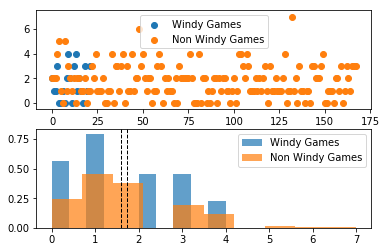

In [27]:
population1, population2 = gendata()

In [28]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=-0.4789400233452227, pvalue=0.6358220766869369)

In [30]:
indoorteams = ["DAL", "DET", "IND", "ATL", "NO", "HOU", "ARI", "MIN"]
indoorteams_df = df.loc[df["Away Team"].isin(indoorteams), :]
indoorteams_df.head(10)

,Game ID,Week,Date,Time (EST),Location,Home Team,Away Team,Home Score,Away Score,Total Points,...,Precip Type,Temp,Apparent Temp,Humidity,Wind Speed,Wind Gust,Cloud Cover,UV Index,Visibility,Indoor
0,45944,1,2018-09-06,8:20PM,Lincoln Financial Field,PHI,ATL,18,12,30,...,rain,81.35,85.2,0.7,2.92,4.52,0.56,0,10,False
3,45947,1,2018-09-09,1:00PM,Gillette Stadium,NE,HOU,27,20,47,...,No Data,62.22,62.22,0.61,6.7,8.48,0.78,5,10,False
10,45954,1,2018-09-09,4:25PM,Bank of America Stadium,CAR,DAL,16,8,24,...,No Data,83.77,88.82,0.66,6.47,6.93,0.66,3,10,False
19,45963,2,2018-09-16,1:00PM,Nissan Stadium,TEN,HOU,20,17,37,...,rain,81.59,84.75,0.65,7.42,7.42,No Data,No Data,10,False
20,45964,2,2018-09-16,1:00PM,FedEx Field,WAS,IND,9,21,30,...,rain,73.86,74.77,0.81,5.59,8.3,No Data,No Data,7.72,False
24,45968,2,2018-09-16,1:00PM,Lambeau Field,GB,MIN,29,29,58,...,rain,78.16,79.01,0.71,5.24,5.43,No Data,No Data,10,False
26,45970,2,2018-09-16,4:05PM,Los Angeles Memorial Coliseum,LA,ARI,34,0,34,...,No Data,85.64,85.64,0.25,4.78,10.01,0,8,10,False
27,45971,2,2018-09-16,4:05PM,Levi's Stadium,SF,DET,30,27,57,...,No Data,72.62,72.62,0.38,5.07,12.1,0.01,7,10,False
37,45981,3,2018-09-23,1:00PM,Lincoln Financial Field,PHI,IND,20,16,36,...,rain,61.28,61.55,0.94,3.73,3.97,0.99,4,8.41,False
38,45982,3,2018-09-23,1:00PM,Mercedes-Benz Stadium,ATL,NO,37,43,80,...,No Data,85.07,86.82,0.51,3.32,7.8,0.47,6,3.94,True


In [31]:
indoorteams_df = indoorteams_df.loc[indoorteams_df["Indoor"] == False, :]
indoorteams_df.head(25)

,Game ID,Week,Date,Time (EST),Location,Home Team,Away Team,Home Score,Away Score,Total Points,...,Precip Type,Temp,Apparent Temp,Humidity,Wind Speed,Wind Gust,Cloud Cover,UV Index,Visibility,Indoor
0,45944,1,2018-09-06,8:20PM,Lincoln Financial Field,PHI,ATL,18,12,30,...,rain,81.35,85.2,0.7,2.92,4.52,0.56,0,10,False
3,45947,1,2018-09-09,1:00PM,Gillette Stadium,NE,HOU,27,20,47,...,No Data,62.22,62.22,0.61,6.7,8.48,0.78,5,10,False
10,45954,1,2018-09-09,4:25PM,Bank of America Stadium,CAR,DAL,16,8,24,...,No Data,83.77,88.82,0.66,6.47,6.93,0.66,3,10,False
19,45963,2,2018-09-16,1:00PM,Nissan Stadium,TEN,HOU,20,17,37,...,rain,81.59,84.75,0.65,7.42,7.42,No Data,No Data,10,False
20,45964,2,2018-09-16,1:00PM,FedEx Field,WAS,IND,9,21,30,...,rain,73.86,74.77,0.81,5.59,8.3,No Data,No Data,7.72,False
24,45968,2,2018-09-16,1:00PM,Lambeau Field,GB,MIN,29,29,58,...,rain,78.16,79.01,0.71,5.24,5.43,No Data,No Data,10,False
26,45970,2,2018-09-16,4:05PM,Los Angeles Memorial Coliseum,LA,ARI,34,0,34,...,No Data,85.64,85.64,0.25,4.78,10.01,0,8,10,False
27,45971,2,2018-09-16,4:05PM,Levi's Stadium,SF,DET,30,27,57,...,No Data,72.62,72.62,0.38,5.07,12.1,0.01,7,10,False
37,45981,3,2018-09-23,1:00PM,Lincoln Financial Field,PHI,IND,20,16,36,...,rain,61.28,61.55,0.94,3.73,3.97,0.99,4,8.41,False
45,45989,3,2018-09-23,4:25PM,CenturyLink Field,SEA,DAL,24,13,37,...,No Data,62.81,62.81,0.52,1.94,3.86,0.54,4,5,False


In [33]:
indoorteams2_df = df.loc[df["Home Team"].isin(indoorteams), :]
indoorteams2_df.head(10)

,Game ID,Week,Date,Time (EST),Location,Home Team,Away Team,Home Score,Away Score,Total Points,...,Precip Type,Temp,Apparent Temp,Humidity,Wind Speed,Wind Gust,Cloud Cover,UV Index,Visibility,Indoor
2,45946,1,2018-09-09,1:00PM,Lucas Oil Stadium,IND,CIN,23,34,57,...,rain,59.17,59.2,0.94,9.64,10.26,1,4,3.26,True
6,45950,1,2018-09-09,1:00PM,US Bank Stadium,MIN,SF,24,16,40,...,No Data,68.37,68.37,0.59,9.28,11.52,0.16,5,10,True
7,45951,1,2018-09-09,1:00PM,Mercedes-Benz Superdome,NO,TB,40,48,88,...,No Data,88.27,97.12,0.63,1.49,2.73,0.62,6,10,True
12,45956,1,2018-09-09,4:25PM,State Farm Stadium,ARI,WAS,6,24,30,...,No Data,100.84,100.84,0.23,3.09,8.34,0.12,8,10,True
14,45958,1,2018-09-10,7:10PM,Ford Field,DET,NYJ,17,48,65,...,No Data,63.56,63.56,0.81,7.94,8.28,1,0,10,True
17,45961,2,2018-09-16,1:00PM,Mercedes-Benz Stadium,ATL,CAR,31,24,55,...,rain,79.2,81.88,0.72,5.91,10.48,No Data,No Data,3.04,True
18,45962,2,2018-09-16,1:00PM,Mercedes-Benz Superdome,NO,CLE,21,18,39,...,rain,91.06,103.1,0.61,1.78,2.77,No Data,No Data,10,True
30,45974,2,2018-09-16,8:20PM,AT&T Stadium,DAL,NYG,20,13,33,...,No Data,87.31,93.05,0.58,2.47,3.04,0.29,0,10,True
33,45977,3,2018-09-23,1:00PM,US Bank Stadium,MIN,BUF,6,27,33,...,No Data,69.02,69.02,0.56,6.2,6.54,0.04,5,10,True
38,45982,3,2018-09-23,1:00PM,Mercedes-Benz Stadium,ATL,NO,37,43,80,...,No Data,85.07,86.82,0.51,3.32,7.8,0.47,6,3.94,True


In [34]:
# Generate some fake data to test with
def gendata(loc1=0, loc2=0):
    population1 = indoorteams2_df["Home FG Pct"]
    population2 = indoorteams_df["Away FG Pct"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="Indoor Teams at Home")
    plt.scatter(range(len(population2)), population2, label="Indoor Teams Outside")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="Indoor Teams at Home")
    plt.hist(population2, 10, density=True, alpha=0.7, label="Indoor Teams Outside")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

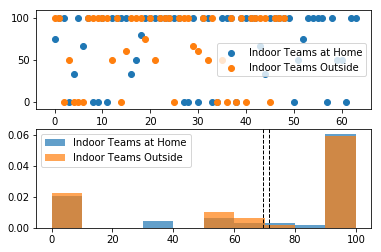

In [35]:
population1, population2 = gendata()

In [36]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=0.21467713377114098, pvalue=0.8304452011486407)

In [40]:
cold_df = df.loc[df["Apparent Temp"] != "No Data",:]
cold_df["Apparent Temp"] = cold_df["Apparent Temp"].astype(float)
cold_df = cold_df.loc[cold_df["Indoor"] == False, :]
cold_df = cold_df.loc[cold_df["Apparent Temp"] <= 32, :]
cold_df["Total Fumbles"] = cold_df["Home Fumbles"] + cold_df["Away Fumbles"]
cold_df.head(25)

,Game ID,Week,Date,Time (EST),Location,Home Team,Away Team,Home Score,Away Score,Total Points,...,Temp,Apparent Temp,Humidity,Wind Speed,Wind Gust,Cloud Cover,UV Index,Visibility,Indoor,Total Fumbles
88,46032,6,2018-10-14,4:05PM,Broncos Stadium at Mile High,DEN,LA,20,23,43,...,24.95,24.95,0.7,2.08,6.48,0.99,3,2.27,False,1
92,46036,6,2018-10-15,8:15PM,Lambeau Field,GB,SF,33,30,63,...,35.56,31.29,0.74,4.96,4.96,0.3,0,10,False,2
144,46086,10,2018-11-11,4:25PM,Lambeau Field,GB,MIA,31,12,43,...,32.56,27.23,0.64,5.58,5.85,0.98,0,10,False,2
159,46097,11,2018-11-18,8:20PM,Soldier Field,CHI,MIN,25,20,45,...,30.28,27.07,0.84,3.21,4.09,0.06,0,10,False,2
177,46121,13,2018-12-02,1:00PM,Lambeau Field,GB,ARI,17,20,37,...,33.98,23.30,0.92,17.55,21.51,1,1,2.39,False,3
193,46137,14,2018-12-09,1:00PM,Lambeau Field,GB,ATL,34,20,54,...,26.54,16.24,0.69,11.34,11.34,0.41,1,9.67,False,5
194,46138,14,2018-12-09,1:00PM,Arrowhead Stadium,KC,BAL,27,24,51,...,29.71,29.71,0.63,1.43,1.53,0,2,10,False,2
199,46144,14,2018-12-09,1:00PM,FedEx Field,WAS,NYG,16,40,56,...,32.85,28.20,0.57,4.85,5.33,0.77,2,8.74,False,1
200,46145,14,2018-12-09,1:00PM,New Era Field,BUF,NYJ,23,27,50,...,29.69,19.26,0.71,13.43,14.5,0.75,1,10,False,3
206,46141,14,2018-12-09,8:20PM,Soldier Field,CHI,LA,15,6,21,...,25.87,21.89,0.8,3.33,3.83,0,0,7.49,False,1


In [41]:
non_cold_df = df.loc[df["Apparent Temp"] != "No Data",:]
non_cold_df["Apparent Temp"] = non_cold_df["Apparent Temp"].astype(float)
non_cold_df = non_cold_df.loc[non_cold_df["Indoor"] == False, :]
non_cold_df = non_cold_df.loc[non_cold_df["Apparent Temp"] > 32, :]
non_cold_df["Total Fumbles"] = non_cold_df["Home Fumbles"] + non_cold_df["Away Fumbles"]
non_cold_df.head(25)

,Game ID,Week,Date,Time (EST),Location,Home Team,Away Team,Home Score,Away Score,Total Points,...,Temp,Apparent Temp,Humidity,Wind Speed,Wind Gust,Cloud Cover,UV Index,Visibility,Indoor,Total Fumbles
0,45944,1,2018-09-06,8:20PM,Lincoln Financial Field,PHI,ATL,18,12,30,...,81.35,85.20,0.7,2.92,4.52,0.56,0,10,False,3
1,45945,1,2018-09-09,1:00PM,M&T Bank Stadium,BAL,BUF,47,3,50,...,62.57,62.66,0.88,11.98,20.49,1,4,4.83,False,5
3,45947,1,2018-09-09,1:00PM,Gillette Stadium,NE,HOU,27,20,47,...,62.22,62.22,0.61,6.7,8.48,0.78,5,10,False,4
4,45948,1,2018-09-09,1:00PM,MetLife Stadium,NYG,JAX,15,20,35,...,58.85,58.85,0.86,4.75,5.52,1,4,8.95,False,1
5,45949,1,2018-09-09,1:00PM,FirstEnergy Stadium,CLE,PIT,21,21,42,...,59.36,59.36,0.92,4.75,8.27,1,4,2.3,False,4
8,45952,1,2018-09-09,1:00PM,Hard Rock Stadium,MIA,TEN,27,20,47,...,88.66,97.33,0.61,4.16,6.23,0.75,6,10,False,0
9,45953,1,2018-09-09,4:05PM,Dignity Health Sports Park,LAC,KC,28,38,66,...,85.35,85.35,0.43,5.19,7.95,0.01,9,8.13,False,2
10,45954,1,2018-09-09,4:25PM,Bank of America Stadium,CAR,DAL,16,8,24,...,83.77,88.82,0.66,6.47,6.93,0.66,3,10,False,3
11,45955,1,2018-09-09,4:25PM,Broncos Stadium at Mile High,DEN,SEA,27,24,51,...,85.18,85.18,0.15,3.7,11.93,0.16,6,3.91,False,3
13,45957,1,2018-09-09,8:20PM,Lambeau Field,GB,CHI,24,23,47,...,60.07,60.07,0.65,4.81,5.92,0,0,10,False,4


In [42]:
# Generate some fake data to test with
def gendata(loc1=0, loc2=0):
    population1 = cold_df["Total Fumbles"]
    population2 = non_cold_df["Total Fumbles"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="Cold Games")
    plt.scatter(range(len(population2)), population2, label="Non Cold Games")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="Cold Games")
    plt.hist(population2, 10, density=True, alpha=0.7, label="Non Cold Games")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

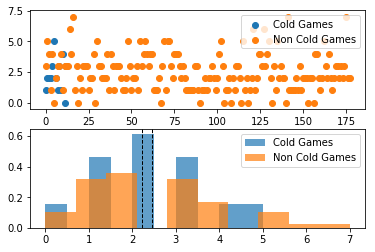

In [43]:
population1, population2 = gendata()

In [44]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=-0.5815767462143588, pvalue=0.5698923227633061)